In [4]:
#importing csv to a Dataframe https://www.kaggle.com/saurabh00007/diabetescsv
import pandas as pd

dataset = pd.read_csv ('diabetes.csv')

In [155]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:
#Independant variable 
X = dataset.iloc[:,:-1]

#Dependant variable
y = dataset['Outcome']

features=X.columns
print(list(enumerate(features)))

#Train/test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
features

[(0, 'Pregnancies'), (1, 'Glucose'), (2, 'BloodPressure'), (3, 'SkinThickness'), (4, 'Insulin'), (5, 'BMI'), (6, 'DiabetesPedigreeFunction'), (7, 'Age')]


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Using boxplots to detect outliers 

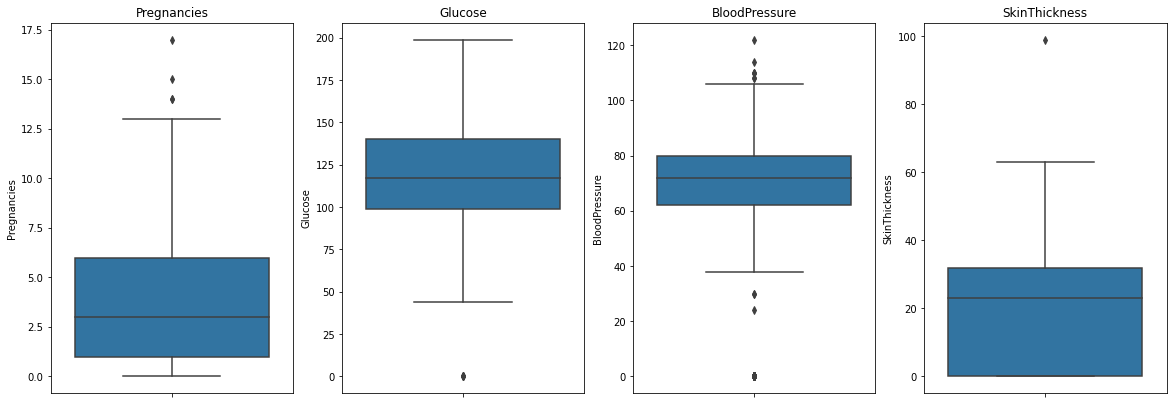

In [75]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb


plt.figure(figsize=(20,15))

features = list(X.columns)


for position, feature in enumerate(features[0:4]):
    plt.subplot(2,len(features[0:4]),position+1)
    sb.boxplot(y=dataset[feature])
    plt.title(feature)



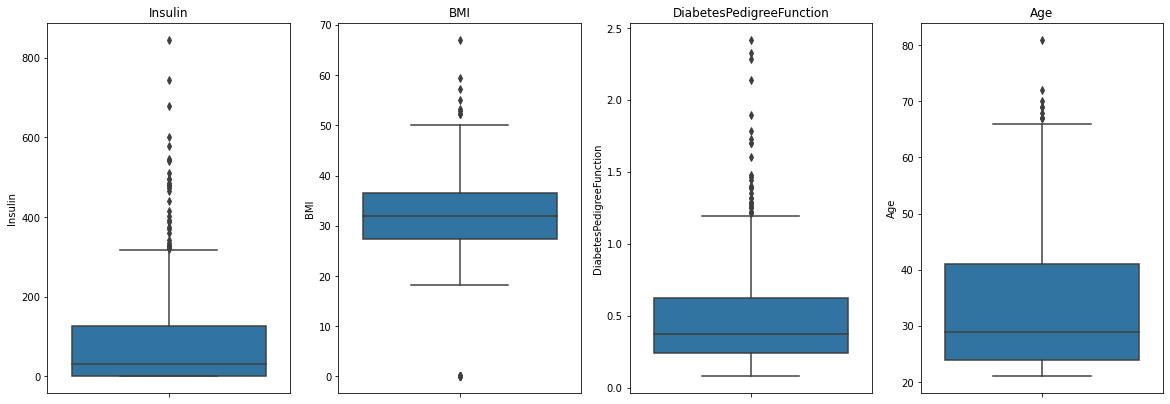

In [90]:
import numpy as np
import matplotlib.pyplot as plt1 
import seaborn as sb



features = list(X.columns)
plt1.figure(figsize=(20,15))




for position, feature in enumerate(features[4:8]):
    plt1.subplot(2,len(features[4:8]),position+1)
    sb.boxplot(y=dataset[feature])
    plt1.title(feature)
    
    



In [104]:
from scipy.stats import iqr

# Interquantil range approach 
    

    
Q1 = np.quantile(dataset['Age'],0.25)
Q3 = np.quantile(dataset['Age'],0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
lower_border=Q1 - 1.4*IQR
uper_border=Q3 + 1.4*IQR

# print(uper_border)
# print(lower_border)


24.0
41.0


In [117]:

from scipy import stats

#using Z score method 

df=pd.DataFrame()
for feature in features:
    df["Z_score_"+feature]=stats.zscore(dataset[feature])
    
    
    
dataset_outlierless=pd.DataFrame()
for feature in features:
    dataset_outlierless = dataset.loc[df['Z_score_'+feature].abs()<=2.0]
print(dataset_outlierless)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

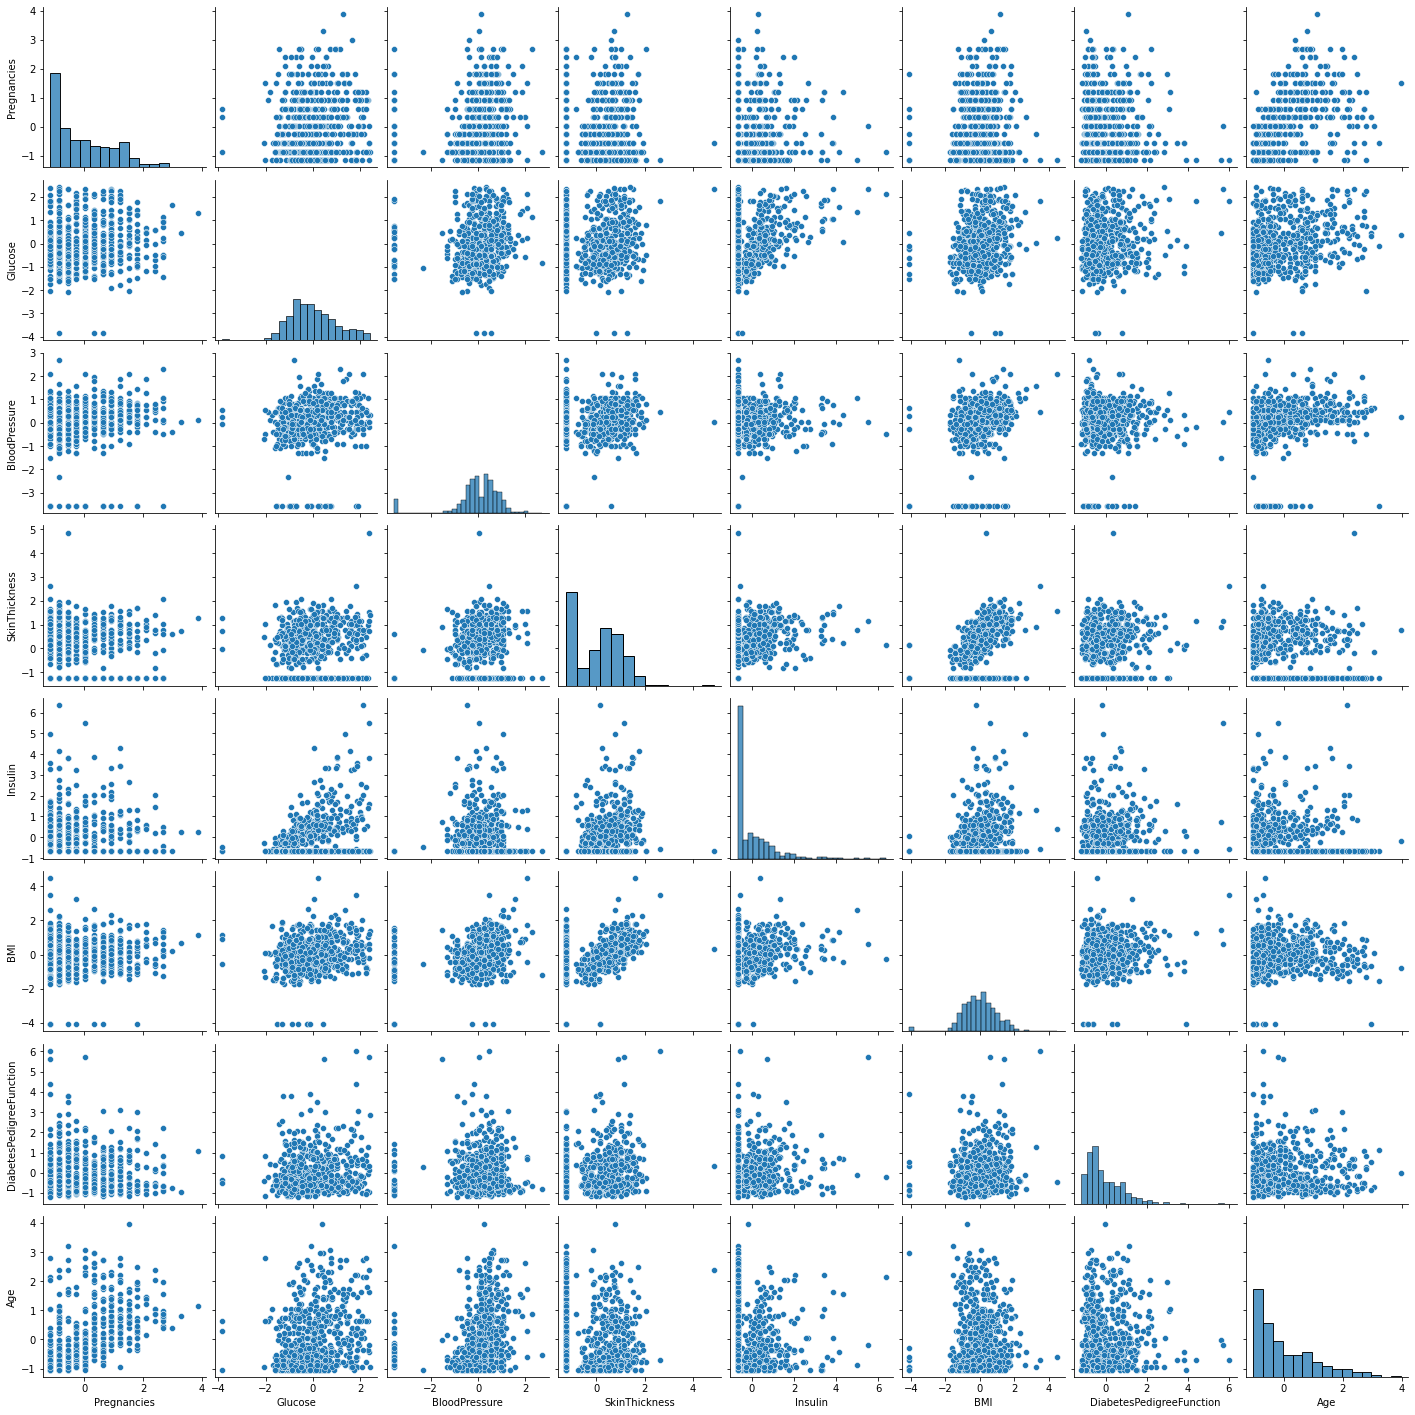

In [156]:
from sklearn.preprocessing import StandardScaler 
#Data standardization 
standardizer =  StandardScaler()

X_std = standardizer.fit_transform(X_train)
X_std = pd.DataFrame(X_std, columns=X_train.columns)



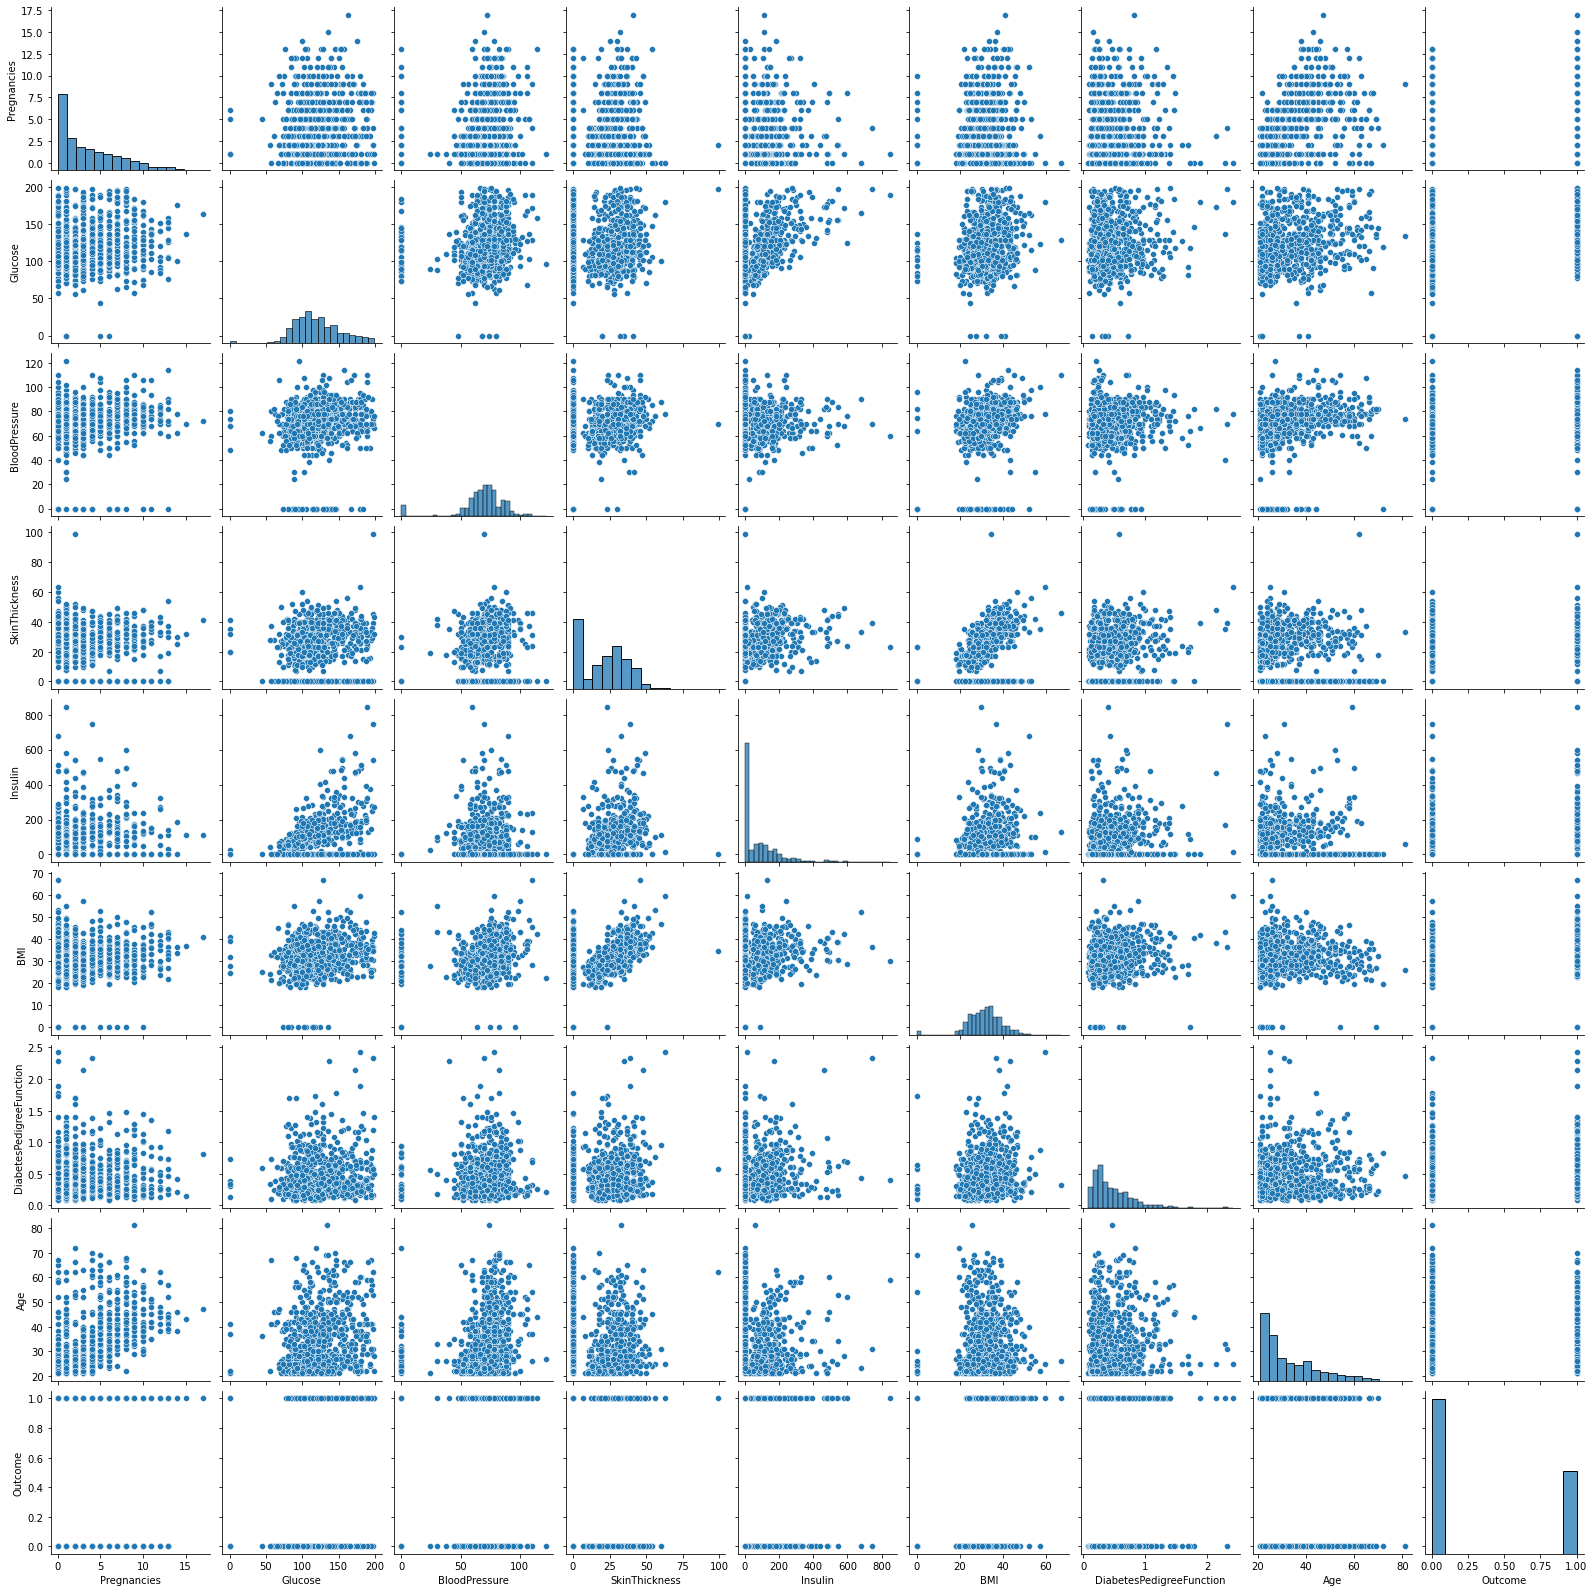

In [154]:
sns.pairplot(dataset)

In [190]:
from sklearn.decomposition import PCA
# using PCA transformation technique  to find the best dimensions for our data 
pca = PCA()

X_pca = pca.fit_transform(X_std)

variances= pca.explained_variance_ratio_


print(variances)




[0.2631561  0.21780363 0.12867723 0.10988752 0.09381136 0.08441937
 0.05148921 0.05075558]
